##  Level 1
### Task 1: Data Cleaning and Preprocessing

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv('/Users/bhavesh/Desktop/codeved/dataset/2) Stock Prices Data Set.csv')

In [41]:
df.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [42]:
print("Initial shape:", df.shape)

Initial shape: (497472, 7)


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  497472 non-null  object 
 1   date    497472 non-null  object 
 2   open    497461 non-null  float64
 3   high    497464 non-null  float64
 4   low     497464 non-null  float64
 5   close   497472 non-null  float64
 6   volume  497472 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 26.6+ MB


In [44]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [45]:
df.isnull().sum()

symbol     0
date       0
open      11
high       8
low        8
close      0
volume     0
dtype: int64

In [46]:
df.duplicated().sum()

0

In [47]:
#df.drop_duplicates(inplace=True)

In [48]:
df = df.sort_values(["symbol", "date"]).reset_index(drop=True)


In [49]:
df

,symbol,date,open,high,low,close,volume
0,A,2014-01-02,57.10,57.100,56.15,56.21,1916160
1,A,2014-01-03,56.39,57.345,56.26,56.92,1866651
2,A,2014-01-06,57.40,57.700,56.56,56.64,1777472
3,A,2014-01-07,56.95,57.630,56.93,57.45,1463208
4,A,2014-01-08,57.33,58.540,57.17,58.39,2659468
...,...,...,...,...,...,...,...
497467,ZTS,2017-12-22,72.30,72.370,71.79,71.99,1345683
497468,ZTS,2017-12-26,72.40,72.550,71.90,72.34,792134
497469,ZTS,2017-12-27,72.59,72.690,72.25,72.45,1159771
497470,ZTS,2017-12-28,72.49,72.600,72.14,72.39,710499


In [50]:
for col in ["open", "high", "low"]:
    df[col] = df.groupby("symbol")[col].ffill().bfill()

In [51]:
df.isnull().sum()

symbol    0
date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [52]:
df['daily_return'] = (df['close']-df["open"])/df['open']
df['price_range'] = df['high'] -df['low']
df["year"] = df['date'].dt.year
df["month"] = df["date"].dt.month
df['weekday'] = df['date'].dt.day_name()

In [53]:
df

,symbol,date,open,high,low,close,volume,daily_return,price_range,year,month,weekday
0,A,2014-01-02,57.10,57.100,56.15,56.21,1916160,-0.015587,0.950,2014,1,Thursday
1,A,2014-01-03,56.39,57.345,56.26,56.92,1866651,0.009399,1.085,2014,1,Friday
2,A,2014-01-06,57.40,57.700,56.56,56.64,1777472,-0.013240,1.140,2014,1,Monday
3,A,2014-01-07,56.95,57.630,56.93,57.45,1463208,0.008780,0.700,2014,1,Tuesday
4,A,2014-01-08,57.33,58.540,57.17,58.39,2659468,0.018489,1.370,2014,1,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
497467,ZTS,2017-12-22,72.30,72.370,71.79,71.99,1345683,-0.004288,0.580,2017,12,Friday
497468,ZTS,2017-12-26,72.40,72.550,71.90,72.34,792134,-0.000829,0.650,2017,12,Tuesday
497469,ZTS,2017-12-27,72.59,72.690,72.25,72.45,1159771,-0.001929,0.440,2017,12,Wednesday
497470,ZTS,2017-12-28,72.49,72.600,72.14,72.39,710499,-0.001380,0.460,2017,12,Thursday


##  Level 1
### Task 2: Exploratory Data Analysis (EDA)

In [54]:
df.describe()

,date,open,high,low,close,volume,daily_return,price_range,year,month
count,497472,497472.000000,497472.000000,497472.000000,497472.000000,4.974720e+05,497472.000000,497472.000000,497472.000000,497472.000000
mean,2016-01-06 17:16:00.439984128,86.352811,87.133263,85.553119,86.369082,4.253611e+06,0.000307,1.580144,2015.512574,6.563521
min,2014-01-02 00:00:00,1.620000,1.690000,1.500000,1.590000,0.000000e+00,-0.492185,-0.255000,2014.000000,1.000000
25%,2015-01-08 00:00:00,41.690000,42.090000,41.280000,41.703750,1.080166e+06,-0.006256,0.630000,2015.000000,4.000000
50%,2016-01-11 00:00:00,64.970000,65.560000,64.353700,64.980000,2.084896e+06,0.000414,1.030000,2016.000000,7.000000
75%,2017-01-06 00:00:00,98.410000,99.230000,97.580000,98.420000,4.271928e+06,0.007050,1.730000,2017.000000,10.000000
max,2017-12-29 00:00:00,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08,0.805807,109.900000,2017.000000,12.000000
std,NaN,101.472255,102.313357,100.572151,101.472407,8.232139e+06,0.013363,2.231448,1.117412,3.424045


In [55]:
print("\nNumber of symbols:", df["symbol"].nunique())
print(df["symbol"].value_counts())


Number of symbols: 505
symbol
A       1007
MYL     1007
NRG     1007
NOV     1007
NOC     1007
        ... 
DXC      189
BHGE     126
BHF      117
DWDP      83
APTV      18
Name: count, Length: 505, dtype: int64


In [56]:
# Top 10 symbols by number of records
top_symbols = df["symbol"].value_counts().head(10)
top_symbols

symbol
A       1007
MYL     1007
NRG     1007
NOV     1007
NOC     1007
NLSN    1007
NKE     1007
NI      1007
NFX     1007
NFLX    1007
Name: count, dtype: int64

In [57]:
corr = df[["open","high","low","close","volume","daily_return","price_range"]].corr()
print("\nCorrelation matrix:\n", corr)


Correlation matrix:
                   open      high       low     close    volume  daily_return  \
open          1.000000  0.999941  0.999928  0.999876 -0.148724     -0.007520   
high          0.999941  1.000000  0.999905  0.999938 -0.148344     -0.002509   
low           0.999928  0.999905  1.000000  0.999941 -0.149284     -0.002251   
close         0.999876  0.999938  0.999941  1.000000 -0.148839      0.002441   
volume       -0.148724 -0.148344 -0.149284 -0.148839  1.000000     -0.008677   
daily_return -0.007520 -0.002509 -0.002251  0.002441 -0.008677      1.000000   
price_range   0.780852  0.784568  0.775964  0.780100 -0.073391     -0.013568   

              price_range  
open             0.780852  
high             0.784568  
low              0.775964  
close            0.780100  
volume          -0.073391  
daily_return    -0.013568  
price_range      1.000000  


In [58]:
##  Level 1
### Task 3: Visualizations

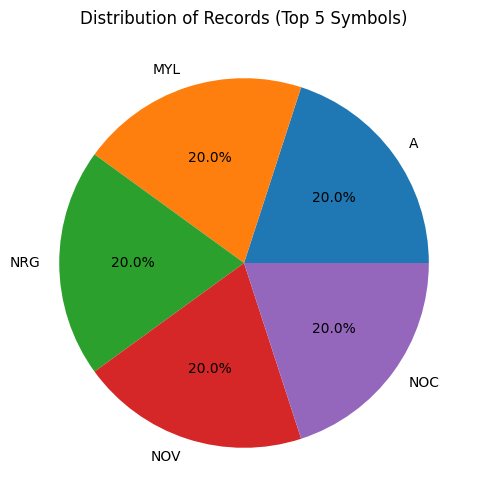

In [59]:
#Pie chart of record distribution across 5 symbols
df['symbol'].value_counts().head(5).plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title("Distribution of Records (Top 5 Symbols)")
plt.ylabel("")
plt.show()

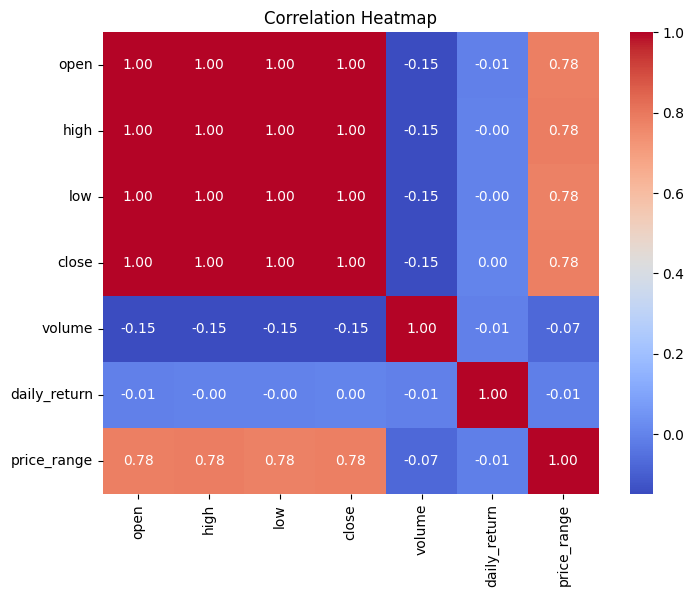

In [60]:
# 3) Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


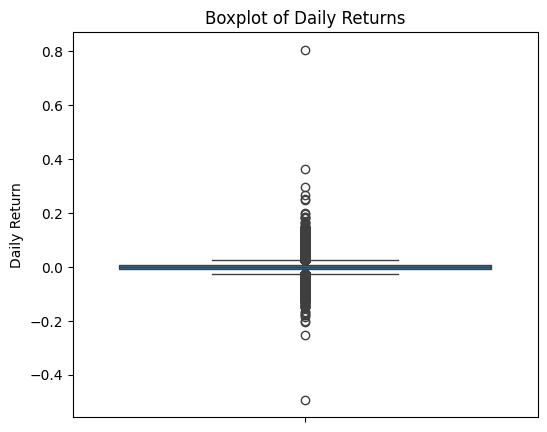

In [61]:
# 4) Boxplot of daily returns
plt.figure(figsize=(6,5))
sns.boxplot(y=df["daily_return"])
plt.title("Boxplot of Daily Returns")
plt.ylabel("Daily Return")
plt.show()


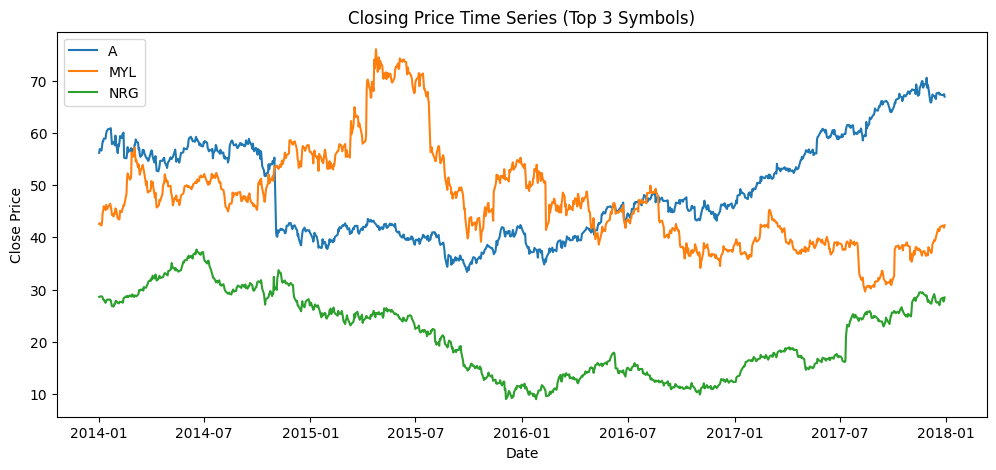

In [62]:
#Time series of closing price for 3 popular symbols
symbols_to_plot = top_symbols.index[:3]
plt.figure(figsize=(12,5))
for sym in symbols_to_plot:
    subset = df[df["symbol"] == sym]
    plt.plot(subset["date"], subset["close"], label=sym)
plt.title("Closing Price Time Series (Top 3 Symbols)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()


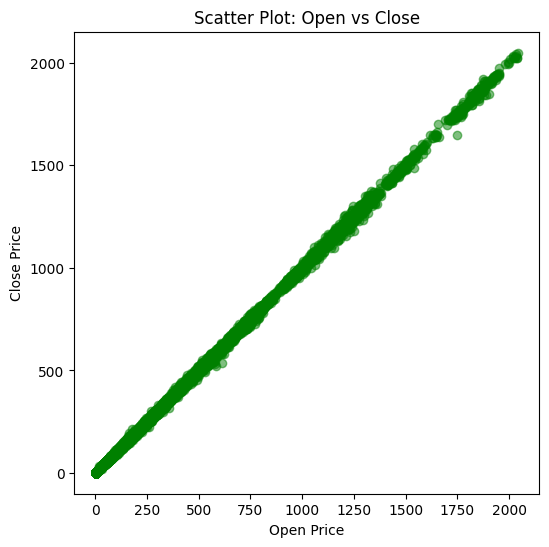

In [63]:
 #Scatter plot: Open vs Close
plt.figure(figsize=(6,6))
plt.scatter(df['open'], df['close'], alpha=0.5, color='green')
plt.title("Scatter Plot: Open vs Close")
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.show()